In [3]:
import scipy as sp
from scipy import stats
import numpy as np

array([-2.77109804, -1.21216746,  1.17813602, -0.27587368,  0.14303352,
        0.91438937,  1.20175657, -0.76195024, -2.09032832,  1.33493709,
       -0.31029822,  0.70700518,  1.85484717, -0.38396622,  0.53909246,
        1.45493877,  2.05932194,  1.748867  , -0.21863978, -1.41970908,
       -0.70126651,  0.02119175,  0.32570304, -0.73019673,  1.27031207,
       -0.00443457,  0.79207695,  1.21941933,  1.38562184,  1.46939187,
        0.99249148,  1.17443874,  0.45870037, -1.23558293,  1.16357985,
        1.01558499,  0.02886778, -0.4049524 , -0.24968236, -1.32696536,
       -0.76849604, -0.21746336,  0.97777545, -0.25757773, -0.00351637,
       -0.02295602, -1.49096203,  0.97647582, -1.52427813,  0.59671717,
        0.49792127,  1.36692206,  0.2068512 , -0.45163674, -1.42075645,
       -1.65315507, -1.62698845, -1.4204022 ,  0.29558207,  0.19590369,
        0.05832603, -0.52802632,  0.52366027,  2.95119349,  3.01016659,
       -1.33164363,  0.10552049, -0.25262135,  0.34535544,  1.69

In [10]:
import seaborn as sns

In [11]:
sns.distplot(np.log(sp.stats.norm(0, 1).rvs(1000)))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


ValueError: cannot convert float NaN to integer

In [18]:
sp.special.logit(.3)

-0.84729786038720356

In [23]:
%matplotlib inline

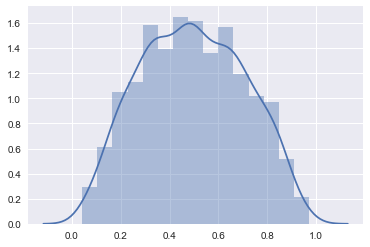

In [27]:
sns.distplot(sp.special.expit(sp.stats.norm(0, 1).rvs(1000)))

In [34]:
import matplotlib.pyplot as plt
sns.set_context('talk')
sns.set_style('white')

(-0.5, 1.5)

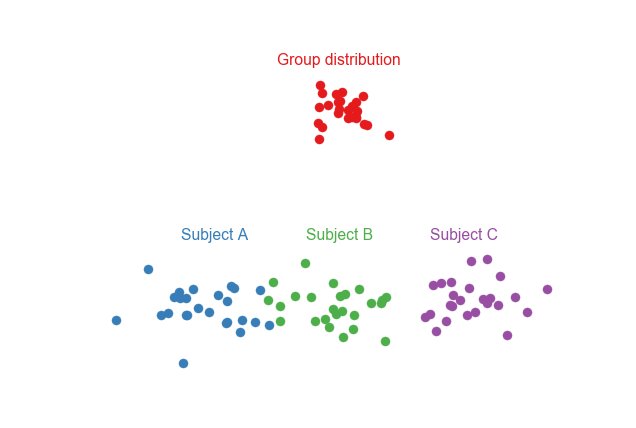

In [64]:
group_dist = sp.stats.norm(5, .3)
subj_a_dist = sp.stats.norm(3.5, .5)
subj_b_dist = sp.stats.norm(5, .5)
subj_c_dist = sp.stats.norm(6.5, .5)

palette = sns.color_palette('Set1')

plt.scatter(group_dist.rvs(25), sp.stats.norm(1, .1).rvs(25), color=palette[0], label='group')

plt.text(5, 1.25, 'Group distribution', horizontalalignment='center', verticalalignment='center', color=palette[0])

plt.scatter(subj_a_dist.rvs(25), sp.stats.norm(0, .1).rvs(25), color=palette[1], label='group')
plt.text(3.5, .35, 'Subject A', horizontalalignment='center', verticalalignment='center', color=palette[1])

plt.scatter(subj_b_dist.rvs(25), sp.stats.norm(0, .1).rvs(25), color=palette[2], label='group')
plt.text(5, .35, 'Subject B', horizontalalignment='center', verticalalignment='center', color=palette[2])

plt.scatter(subj_c_dist.rvs(25), sp.stats.norm(0, .1).rvs(25), color=palette[3], label='group')
plt.text(6.5, .35, 'Subject C', horizontalalignment='center', verticalalignment='center', color=palette[3])

plt.axis('off')

plt.xlim(1.5, 8.5)
plt.ylim(-.5, 1.5)

In [59]:
palette = sns.color_palette('Set1')


(-0.5, 1.5)

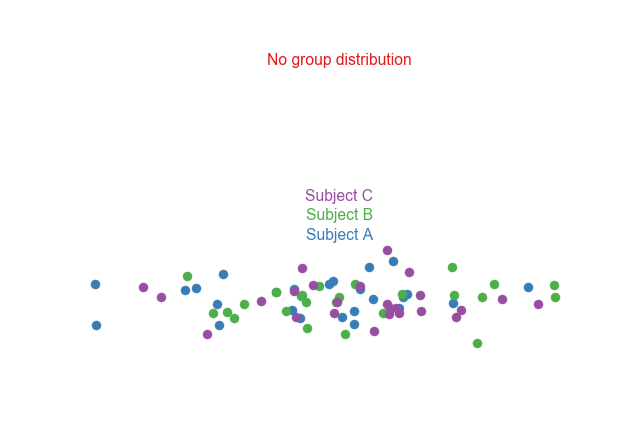

In [66]:
group_dist = sp.stats.norm(5, .3)
subj_a_dist = sp.stats.norm(3.5, .5)
subj_b_dist = sp.stats.norm(5, .5)
subj_c_dist = sp.stats.norm(6.5, .5)

brandon = sp.stats.norm(*sp.stats.norm.fit(np.concatenate((subj_a_dist.rvs(25), subj_b_dist.rvs(25), subj_c_dist.rvs(25)))))

plt.text(5, 1.25, 'No group distribution', horizontalalignment='center', verticalalignment='center', color=palette[0])


# plt.scatter(group_dist.rvs(25), sp.stats.norm(1, .1).rvs(25), color=palette[0], label='group')




plt.scatter(brandon.rvs(25), sp.stats.norm(0, .1).rvs(25), color=palette[1], label='group')
plt.scatter(brandon.rvs(25), sp.stats.norm(0, .1).rvs(25), color=palette[2], label='group')
plt.scatter(brandon.rvs(25), sp.stats.norm(0, .1).rvs(25), color=palette[3], label='group')
plt.text(5, .35, 'Subject A', horizontalalignment='center', verticalalignment='center', color=palette[1])
plt.text(5, .45, 'Subject B', horizontalalignment='center', verticalalignment='center', color=palette[2])
plt.text(5, .55, 'Subject C', horizontalalignment='center', verticalalignment='center', color=palette[3])

plt.axis('off')
plt.xlim(1.5, 8.5)
plt.ylim(-.5, 1.5)

In [44]:
brandon

In [80]:
def mvn_ddm_n(q, k):
    
    return q**2 + q + k*q + k + k**2

def fa_ddm(q, k):
    return q*k + k + q

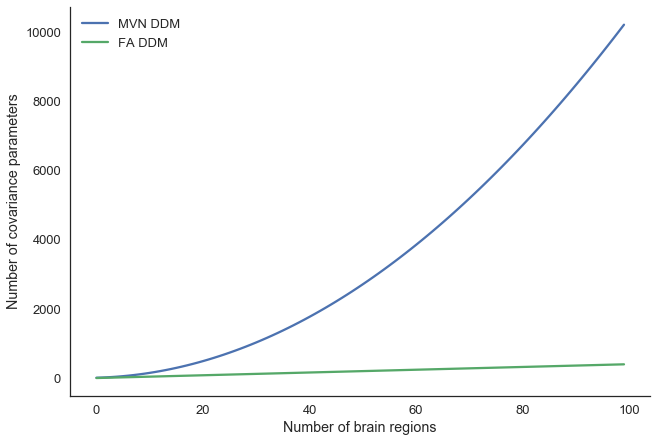

In [95]:
plt.plot(mvn_ddm_n(np.arange(0, 100), 3), label='MVN DDM')
plt.plot(fa_ddm(np.arange(0, 100), 3), label='FA DDM')
sns.despine()

plt.xlabel('Number of brain regions')
plt.ylabel('Number of covariance parameters')
plt.legend()

In [72]:
mvn_ddm_n(50000, 3) / 1e6

2500.200012

In [73]:
import nibabel as nb

In [75]:
nb.load('/usr/local/fsl/data/standard/MNI152_T1_1mm_brain_mask.nii.gz').get_data().sum()

1827243

In [92]:
nb.load('/usr/local/fsl/data/standard/MNI152_T1_2mm_brain_mask.nii.gz').get_data().sum()

228483

In [91]:
mvn_ddm_n(1827243, 3)

3338824290033

In [81]:
fa_ddm(228483, 3)

913935

In [82]:
fa_ddm(1827243, 3)

7308975

In [83]:
#Cortical Area Parcellation from Resting-State Correlations (Gordon 2014)

In [90]:
mvn_ddm_n(333, 3)

112233

In [85]:
fa_ddm(333, 3)

1335

In [89]:
mvn_ddm_n(30, 3)

1032

In [150]:
def plot_diffusion(n=20, bound=200, v=1, sv=.1, dt=0.001, max_t=5):
    drifts = sp.stats.norm(v, sv).rvs(n)
    
    
    samples = sp.stats.norm(drifts, 1.).rvs(( int(max_t/dt), len(drifts)))
    
    samples = np.cumsum(samples, 0)
    
    samples[samples > bound] = np.nan
    
    return samples
    
    
    

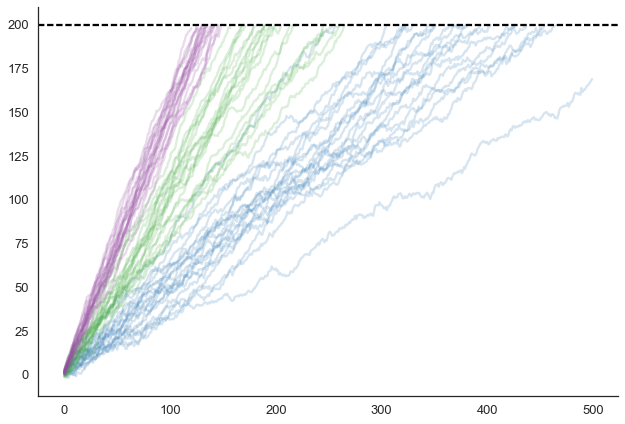

In [151]:

drifts = plot_diffusion(v=.5, sv=.1, dt=0.01)
plt.plot(drifts, color=palette[1], alpha=0.2)

drifts = plot_diffusion(v=1., sv=.1, dt=0.01)
plt.plot(drifts, color=palette[2], alpha=0.2)

drifts = plot_diffusion(v=1.5, sv=.1, dt=0.01)
plt.plot(drifts, color=palette[3], alpha=0.2)


plt.axhline(200, c='k', ls='--')
sns.despine()


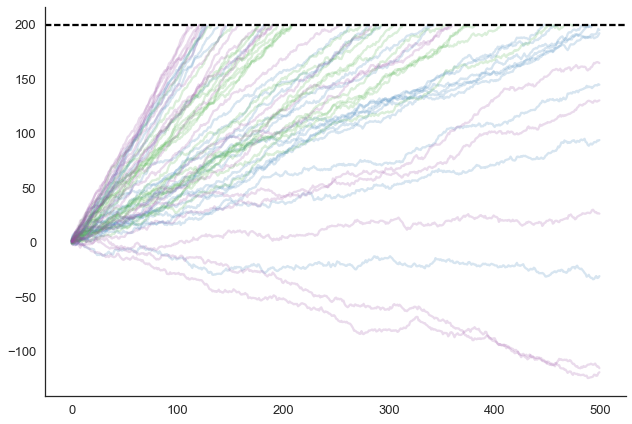

In [152]:

drifts = plot_diffusion(v=1., sv=.5, dt=0.01)
plt.plot(drifts, color=palette[1], alpha=0.2)

drifts = plot_diffusion(v=1., sv=.5, dt=0.01)
plt.plot(drifts, color=palette[2], alpha=0.2)

drifts = plot_diffusion(v=1., sv=.5, dt=0.01)
plt.plot(drifts, color=palette[3], alpha=0.2)


plt.axhline(200, c='k', ls='--')
sns.despine()


In [ ]:

drifts = plot_diffusion(v=.5, sv=.1, dt=0.01)
plt.plot(drifts, color=palette[1], alpha=0.2)

drifts = plot_diffusion(v=1., sv=.1, dt=0.01)
plt.plot(drifts, color=palette[2], alpha=0.2)

drifts = plot_diffusion(v=1.5, sv=.1, dt=0.01)
plt.plot(drifts, color=palette[3], alpha=0.2)


plt.axhline(200, c='k', ls='--')
sns.despine()


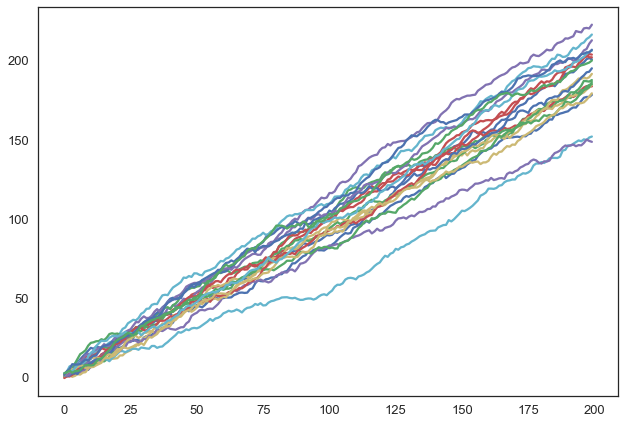

In [136]:

drifts = plot_diffusion(v=.5, sv=.1, dt=0.01)
plt.plot(drifts, color=palette[1], alpha=0.2)

drifts = plot_diffusion(v=1., sv=.1, dt=0.01)
plt.plot(drifts, color=palette[2], alpha=0.2)

drifts = plot_diffusion(v=1.5, sv=.1, dt=0.01)
plt.plot(drifts, color=palette[3], alpha=0.2)


plt.axhline(200, c='k', ls='--')

sns.despine()


In [154]:
from skimage import io

In [156]:
im = io.imread('/Users/gilles/Downloads/2015-bmw-3-series-active-hybrid-sedan-side-view-black-sapphire-metallic.png')

In [181]:
X, Y = np.mgrid[0:im.shape[0], 0:im.shape[1]]

In [182]:
gr

NameError: name 'gr' is not defined

In [183]:
import matplotlib.mlab as mlab


In [216]:
left_wheel = sp.stats.multivariate_normal([50, 150], [[25, 0], [0,25]])

Z1 = np.ma.masked_less(mlab.bivariate_normal(X, Y, 25, 25, 150, 50), 1e-4)

Z2 = np.ma.masked_less(mlab.bivariate_normal(X, Y, 25, 25, 150, 325), 1e-4)

Z3 = np.ma.masked_less(mlab.bivariate_normal(X, Y, 50, 25, 80, 150, 50), 1e-4)

(-0.5, 416.5, 224.5, -0.5)

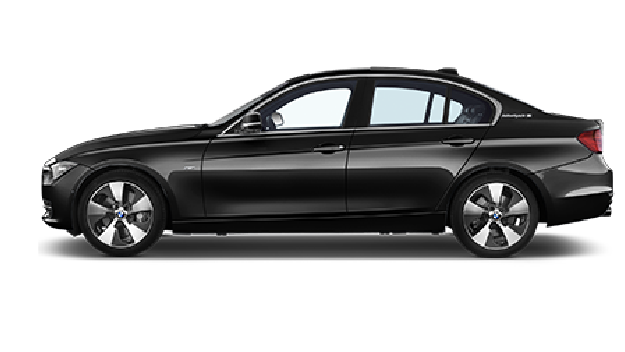

In [219]:
plt.imshow(im)
plt.axis('off')

(-0.5, 416.5, 224.5, -0.5)

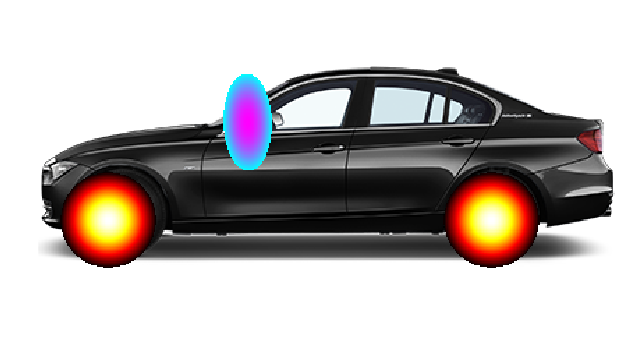

In [220]:
plt.imshow(im)

plt.imshow(Z1, cmap=plt.cm.hot)

plt.imshow(Z2, cmap=plt.cm.hot)

plt.imshow(Z3, cmap=plt.cm.cool)

plt.axis('off')

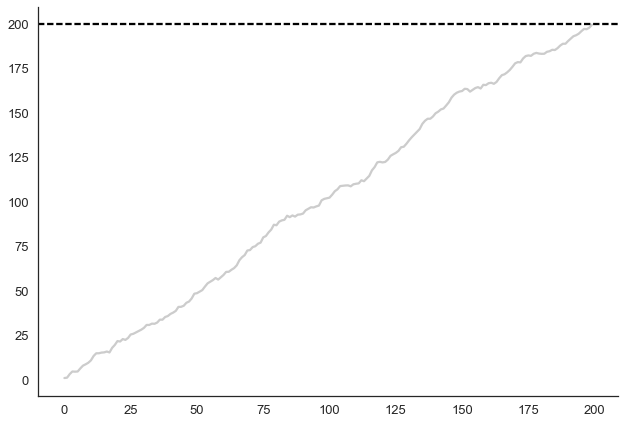

In [222]:

drifts = plot_diffusion(v=1., sv=.5, dt=0.01, n=1)
plt.plot(drifts, color='k', alpha=0.2)


plt.axhline(200, c='k', ls='--')
sns.despine()
